<a href="https://colab.research.google.com/github/ImSouritra/Deep-Learning-and-Neural-Networks/blob/master/Food%20Vision%20101/Food_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Vision Big

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-fa5c8b80-5340-678b-9e17-36bf971e9aa9)


## Getting helper functions

I've created few helper functions and uploaded them on github to avoid reusing the same functions over and over again


In [2]:
!wget https://raw.githubusercontent.com/ImSouritra/Deep-Learning-and-Neural-Networks/master/helper_functions.py

--2022-10-21 04:23:18--  https://raw.githubusercontent.com/ImSouritra/Deep-Learning-and-Neural-Networks/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7705 (7.5K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   7.52K  --.-KB/s    in 0s      

2022-10-21 04:23:18 (91.3 MB/s) - ‘helper_functions.py’ saved [7705/7705]



In [3]:
from helper_functions import *
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Use Tensorflow datasets to get data

In [4]:
import tensorflow_datasets as tfds

In [5]:
dataset_list = tfds.list_builders()
print("food101" in dataset_list)

True


In [6]:
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train","validation"],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incomplete13ZBUU/food101-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incomplete13ZBUU/food101-validation.tfrecord*...:   0%|         …

Dataset food101 downloaded and prepared to ~/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Exploring the Food101 from Tensorflow datasets
To become one with the data we want to find:
* Class names
* The shape of your input data 
* The datatype of input data
* What the labels look like (Are they one-hot encoded or are they label encoded)
* Do the labels match up with the class names

In [7]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [8]:
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [9]:
# Take one sample of train data
train_one_sample = train_data.take(1)
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

Image Shape : (512, 512, 3), Label: chocolate_cake


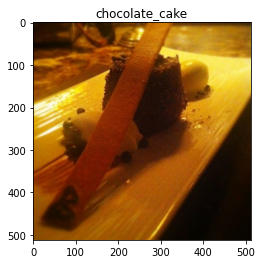

In [10]:
# what does one sample of our train data look like
for image, label in train_one_sample:
  print(f"Image Shape : {image.shape}, Label: {class_names[label]}")
  plt.imshow(image)
  plt.title(class_names[label])

In [11]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

## Creating preprocessing functions for our data
We need to do the following:
* Reshape all the images to same shape
* Convert datatype 'uint8' to 'float32'

In [12]:
def preprocess_image(image,label,img_shape=[224,224]):
  image = tf.image.resize(image,size=img_shape)
  image = tf.image.convert_image_dtype(image,dtype=tf.float32)
  return (image,label)

In [13]:
preprocess_image(image,label)

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[2.9198980e+01, 1.1198979e+01, 0.0000000e+00],
         [2.8285715e+01, 1.2285714e+01, 0.0000000e+00],
         [3.0852041e+01, 1.5494898e+01, 2.8061217e-01],
         ...,
         [5.2933601e+01, 3.2505074e+01, 8.7193365e+00],
         [5.4025528e+01, 3.4025528e+01, 1.0025528e+01],
         [5.3800972e+01, 3.3800972e+01, 9.5713587e+00]],
 
        [[3.3096939e+01, 1.5096939e+01, 1.1938781e+00],
         [3.3785713e+01, 1.7785715e+01, 2.7857151e+00],
         [3.1785713e+01, 1.6428572e+01, 1.2142859e+00],
         ...,
         [6.3602058e+01, 4.2530632e+01, 1.5346998e+01],
         [6.1647934e+01, 4.0785702e+01, 1.3928558e+01],
         [6.0785713e+01, 4.1714287e+01, 1.2020403e+01]],
 
        [[3.1576530e+01, 1.3576531e+01, 6.4285755e-01],
         [3.3357147e+01, 1.7357143e+01, 2.3571434e+00],
         [3.6168365e+01, 2.0811226e+01, 5.5969391e+00],
         ...,
         [6.7688797e+01, 4.4474506e+01, 1.0852092e+01],


## Batch and prepare datasets

In [14]:
# Map preprocessing function to training data
train_data = train_data.map(map_func=preprocess_image,num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn them into  batches
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)


In [15]:
# Map Preprocessing function to test data
test_data = test_data.map(map_func=preprocess_image,num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle test data and turn them into batches
test_data = test_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
len(train_data), len(test_data)

(2368, 790)

## Creating modelling callbacks

We're going to create a couple callbacks to help us while our model train
* Tensorboard callbacks to visualize loss and accuracy of train and valid data
* Model checkpoint callback to save the progress of a model while training

In [17]:
# Checkpoint Callback
checkpoint_path = "model_checkpoints/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         monitor='val_acc',
                                                         save_best_only=True,
                                                         save_weights_only=True,
                                                         verbose=1)

In [18]:
# Setup mixed precision training
from keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

In [19]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False

inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")
x = base_model(inputs,training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x = tf.keras.layers.Dense(len(class_names))(x)
outputs = tf.keras.layers.Activation("softmax",dtype=tf.float32)(x)
model_1 = tf.keras.Model(inputs,outputs)
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data),callbacks=[create_tensorboard_callback("logs","model_1")])


24274472/24274472 [==============================] - 0s 0us/step
Creating tensorboard log file in logs/model_12022$m$d-044336
Epoch 1/5
2368/2368 [==============================] - 241s 95ms/step - loss: 1.7474 - accuracy: 0.5763 - val_loss: 1.1518 - val_accuracy: 0.6927
Epoch 2/5
2368/2368 [==============================] - 232s 97ms/step - loss: 1.2117 - accuracy: 0.6863 - val_loss: 1.0371 - val_accuracy: 0.7214
Epoch 3/5
2368/2368 [==============================] - 222s 93ms/step - loss: 1.0643 - accuracy: 0.7228 - val_loss: 0.9965 - val_accuracy: 0.7289
Epoch 4/5
2368/2368 [==============================] - 220s 92ms/step - loss: 0.9678 - accuracy: 0.7470 - val_loss: 0.9767 - val_accuracy: 0.7326
Epoch 5/5
2368/2368 [==============================] - 221s 93ms/step - loss: 0.8978 - accuracy: 0.7630 - val_loss: 0.9586 - val_accuracy: 0.7388


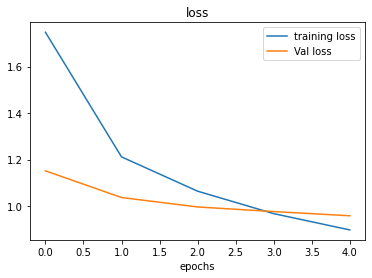

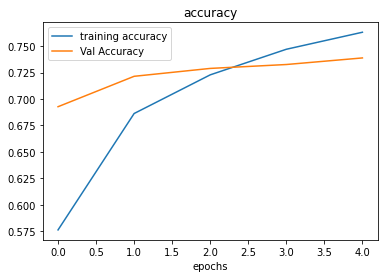

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 activation (Activation)     (None, 101)               0         
                                                                 
Total params: 6,048,693
Trainable params: 129,381
Non-trainab

## Checking layers in our feature extraction model

In [ ]:
# Checking the layers in our base model
for i,layer in enumerate(model_1.layers[1].layers):
  print(i,layer.name,layer.dtype,layer.dtype_policy)

0 input_1 float32 <Policy "float32">
1 rescaling float32 <Policy "mixed_float16">
2 normalization float32 <Policy "mixed_float16">
3 stem_conv float32 <Policy "mixed_float16">
4 stem_bn float32 <Policy "mixed_float16">
5 stem_activation float32 <Policy "mixed_float16">
6 block1a_project_conv float32 <Policy "mixed_float16">
7 block1a_project_bn float32 <Policy "mixed_float16">
8 block1a_project_activation float32 <Policy "mixed_float16">
9 block2a_expand_conv float32 <Policy "mixed_float16">
10 block2a_expand_bn float32 <Policy "mixed_float16">
11 block2a_expand_activation float32 <Policy "mixed_float16">
12 block2a_project_conv float32 <Policy "mixed_float16">
13 block2a_project_bn float32 <Policy "mixed_float16">
14 block2b_expand_conv float32 <Policy "mixed_float16">
15 block2b_expand_bn float32 <Policy "mixed_float16">
16 block2b_expand_activation float32 <Policy "mixed_float16">
17 block2b_project_conv float32 <Policy "mixed_float16">
18 block2b_project_bn float32 <Policy "mixed_f

In [ ]:
# Evaluate on all of the test data
model_1_results = model_1.evaluate(test_data)
model_1_results

790/790 [==============================] - 55s 68ms/step - loss: 0.9586 - accuracy: 0.7388


[0.9586107134819031, 0.7387722730636597]

## Setting up a data augmentation layer for model_2

In [21]:
data_augmentation = tf.keras.Sequential([
                    tf.keras.layers.RandomFlip("horizontal"),
                    tf.keras.layers.RandomHeight(0.2),
                    tf.keras.layers.RandomWidth(0.2),
                    tf.keras.layers.RandomZoom(0.3)
                    ], name="data_augmentation_layer")

## Building model_2
Model_2:
1. Data augmentation layer
2. Model checkpoint callback
3. Fine tuning

In [22]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False

inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x,training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x = tf.keras.layers.Dense(len(class_names))(x)
outputs = tf.keras.layers.Activation("softmax",dtype=tf.float32,name="feature_extraction_layer")(x)
model_2 = tf.keras.Model(inputs,outputs)
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model_2.summary()

24274472/24274472 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 dense (Dense)               (None, 101)               129381 

In [23]:
for i, layer in enumerate(model_2.layers):
  print(i, layer.name,layer.trainable, layer.dtype,layer.dtype_policy)

0 input_layer True float32 <Policy "float32">
1 data_augmentation_layer True float32 <Policy "mixed_float16">
2 efficientnetv2-b0 False float32 <Policy "mixed_float16">
3 global_average_pooling_layer True float32 <Policy "mixed_float16">
4 dense True float32 <Policy "mixed_float16">
5 feature_extraction_layer True float32 <Policy "float32">


In [24]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name,layer.trainable, layer.dtype,layer.dtype_policy)

0 input_1 False float32 <Policy "float32">
1 rescaling False float32 <Policy "mixed_float16">
2 normalization False float32 <Policy "mixed_float16">
3 stem_conv False float32 <Policy "mixed_float16">
4 stem_bn False float32 <Policy "mixed_float16">
5 stem_activation False float32 <Policy "mixed_float16">
6 block1a_project_conv False float32 <Policy "mixed_float16">
7 block1a_project_bn False float32 <Policy "mixed_float16">
8 block1a_project_activation False float32 <Policy "mixed_float16">
9 block2a_expand_conv False float32 <Policy "mixed_float16">
10 block2a_expand_bn False float32 <Policy "mixed_float16">
11 block2a_expand_activation False float32 <Policy "mixed_float16">
12 block2a_project_conv False float32 <Policy "mixed_float16">
13 block2a_project_bn False float32 <Policy "mixed_float16">
14 block2b_expand_conv False float32 <Policy "mixed_float16">
15 block2b_expand_bn False float32 <Policy "mixed_float16">
16 block2b_expand_activation False float32 <Policy "mixed_float16">
1

In [25]:
initial_epochs=5
history_model_2 = model_2.fit(train_data,epochs=initial_epochs,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=(0.15*len(test_data)),callbacks=[create_tensorboard_callback("logs","model_2"), checkpoint_callback])

Creating tensorboard log file in logs/model_22022$m$d-043611
Epoch 1/5
2368/2368 [==============================] - ETA: 0s - loss: 2.0746 - accuracy: 0.4993

2368/2368 [==============================] - 276s 110ms/step - loss: 2.0746 - accuracy: 0.4993 - val_loss: 1.2310 - val_accuracy: 0.6757
Epoch 2/5
2368/2368 [==============================] - ETA: 0s - loss: 1.5599 - accuracy: 0.6013

2368/2368 [==============================] - 222s 93ms/step - loss: 1.5599 - accuracy: 0.6013 - val_loss: 1.1199 - val_accuracy: 0.6954
Epoch 3/5
2368/2368 [==============================] - ETA: 0s - loss: 1.4274 - accuracy: 0.6309

2368/2368 [==============================] - 215s 90ms/step - loss: 1.4274 - accuracy: 0.6309 - val_loss: 1.0650 - val_accuracy: 0.7135
Epoch 4/5
2368/2368 [==============================] - ETA: 0s - loss: 1.3575 - accuracy: 0.6471

2368/2368 [==============================] - 212s 89ms/step - loss: 1.3575 - accuracy: 0.6471 - val_loss: 1.0409 - val_accuracy: 0.7166
Epoch 5/5
2368/2368 [==============================] - ETA: 0s - loss: 1.3041 - accuracy: 0.6579

2368/2368 [==============================] - 212s 89ms/step - loss: 1.3041 - accuracy: 0.6579 - val_loss: 1.0037 - val_accuracy: 0.7195


In [26]:
model_2_data_augmented_results = model_2.evaluate(test_data)
model_2_data_augmented_results

790/790 [==============================] - 53s 66ms/step - loss: 1.0248 - accuracy: 0.7199


[1.0248303413391113, 0.7198811769485474]

We can see that just by adding a data augmentation layer our model results have improved from model_2. Now let's do fine tuning

## Fine tuning Model_2

In [27]:
for i, layer in enumerate(model_2.layers):
  print(i, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation_layer True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 dense True
5 feature_extraction_layer True


In [28]:
base_model.trainable=True

## Freeze all layers except of last 10
for layer in base_model.layers[:-10]:
  layer.trainable=False

In [29]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 Fals

In [30]:
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=["accuracy"])

In [31]:
for i, layer in enumerate(model_2.layers):
  print(i, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation_layer True
2 efficientnetv2-b0 True
3 global_average_pooling_layer True
4 dense True
5 feature_extraction_layer True


In [32]:
history_fine_tuned_model_2 = model_2.fit(train_data, epochs=initial_epochs+5, steps_per_epoch=len(train_data), initial_epoch=history_model_2.epoch[-1],validation_data=test_data,validation_steps=(0.15*len(test_data)),callbacks=[create_tensorboard_callback("logs","fine_tuned_model_2")])

Creating tensorboard log file in logs/fine_tuned_model_22022$m$d-045942
Epoch 5/10
2368/2368 [==============================] - 223s 90ms/step - loss: 1.1549 - accuracy: 0.6959 - val_loss: 0.9457 - val_accuracy: 0.7463
Epoch 6/10
2368/2368 [==============================] - 213s 89ms/step - loss: 1.0715 - accuracy: 0.7150 - val_loss: 0.9134 - val_accuracy: 0.7513
Epoch 7/10
2368/2368 [==============================] - 212s 89ms/step - loss: 1.0081 - accuracy: 0.7313 - val_loss: 0.8848 - val_accuracy: 0.7613
Epoch 8/10
2368/2368 [==============================] - 212s 89ms/step - loss: 0.9597 - accuracy: 0.7417 - val_loss: 0.8604 - val_accuracy: 0.7613
Epoch 9/10
2368/2368 [==============================] - 213s 89ms/step - loss: 0.9165 - accuracy: 0.7523 - val_loss: 0.8546 - val_accuracy: 0.7647
Epoch 10/10
2368/2368 [==============================] - 213s 89ms/step - loss: 0.8800 - accuracy: 0.7614 - val_loss: 0.8545 - val_accuracy: 0.7668


In [33]:
history_fine_tuned_model_2_results = model_2.evaluate(test_data)
history_fine_tuned_model_2_results

790/790 [==============================] - 53s 65ms/step - loss: 0.8673 - accuracy: 0.7619


[0.8672589659690857, 0.7619009613990784]

In [34]:
model_2.save("/content/drive/MyDrive/food_vision_model_fine_tuned.h5")

In [37]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/food_vision_model_fine_tuned.h5")

In [38]:
loaded_model.evaluate(test_data)

790/790 [==============================] - 55s 65ms/step - loss: 0.8673 - accuracy: 0.7619


[0.867257833480835, 0.7619009613990784]